# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
# Create a new dataframe from your CSV
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [2]:
# Print out any information you need to understand your dataframe
df.shape

(23486, 11)

In [3]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [4]:
df.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [5]:
df.head()

Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1                        4         General         Dresses    Dresses  
2                        0         General         Dresses    Dresses  
3                        0  General Petite         Bottoms      Pants  
4                        6         General            Tops    Blouses

In [6]:
df.drop(columns=['Unnamed: 0'])

Clothing ID  Age                                              Title  \
0              767   33                                                NaN   
1             1080   34                                                NaN   
2             1077   60                            Some major design flaws   
3             1049   50                                   My favorite buy!   
4              847   47                                   Flattering shirt   
...            ...  ...                                                ...   
23481         1104   34                     Great dress for many occasions   
23482          862   48                         Wish it was made of cotton   
23483         1104   31                              Cute, but see through   
23484         1084   28  Very cute dress, perfect for summer parties an...   
23485         1104   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shirt is very flattering to all due to th...       5   
...                                                  ...     ...   
23481  I was very happy to snag this dress at such a ...       5   
23482  It reminds me of maternity clothes. soft, stre...       3   
23483  This fit well, but the top was very see throug...       3   
23484  I bought this dress for a wedding i have this ...       3   
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
0                    1                        0       Initmates   
1                    1                        4         General   
2                    0                        0         General   
3                    1                        0  General Petite   
4                    1                        6         General   
...                ...                      ...             ...   
23481                1                        0  General Petite   
23482                1                        0  General Petite   
23483                0                        1  General Petite   
23484                1                        2         General   
23485                1                       22  General Petite   

      Department Name Class Name  
0            Intimate  Intimates  
1             Dresses    Dresses  
2             Dresses    Dresses  
3             Bottoms      Pants  
4                Tops    Blouses  
...               ...        ...  
23481         Dresses    Dresses  
23482            Tops      Knits  
23483         Dresses    Dresses  
23484         Dresses    Dresses  
23485         Dresses    Dresses  

[23486 rows x 10 columns]

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

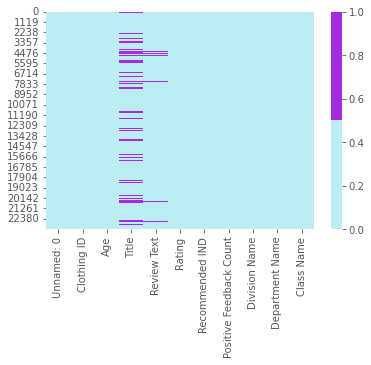

In [7]:
# Plot a heatmap of any missing data
colours = ['#BBEDF2', '#A62AE0'] # specify the colours - yellow is missing. blue is not missing. 
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [8]:
# Try out a missing data percentage list! 
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if pct_missing > 0:
        print(f'{col} - {round(pct_missing*100)}%')

Title - 16%
Review Text - 4%
Division Name - 0%
Department Name - 0%
Class Name - 0%


<AxesSubplot:xlabel='index'>

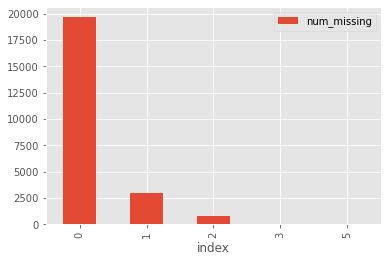

In [9]:
# Plot a missing data histogram
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [34]:
# Handle any missing data in your dataframe.
'''I chose to remove entries missing both review and title. 
These entries aren't useful for Natural Language processing, 
and that's what the Kaggle seemed to want. In other analysis, 
it might not be worth dropping those rows, as the other data 
could still be useful.'''
review_missing = df[df['num_missing']==2].index
df = df.drop(review_missing, axis=0)

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

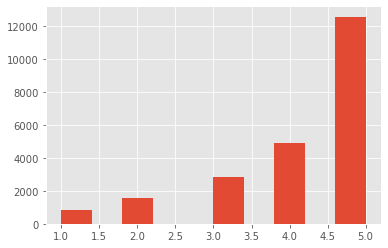

In [36]:
# Plot a histogram to see if there are any outliers.
df['Rating'].hist() 

<AxesSubplot:>

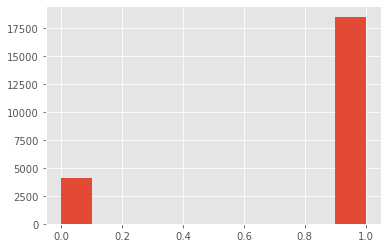

In [37]:
df['Recommended IND'].hist() #Check for non 1 or 0

<AxesSubplot:>

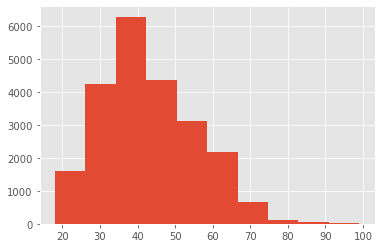

In [38]:
df['Age'].hist() 

In [39]:
# Use the describe() method
df['Age'].describe()

count    22643.000000
mean        43.279998
std         12.326791
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

<AxesSubplot:>

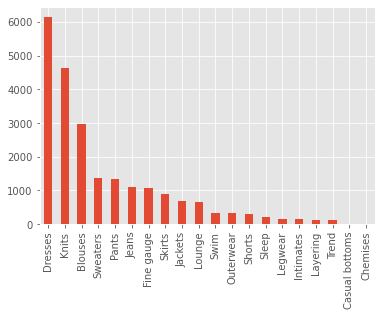

In [40]:
# Plot a bar chart
df['Class Name'].value_counts().plot.bar()

In [48]:
df['Class Name'].value_counts()

Dresses       6146
Knits         4626
Blouses       2983
Sweaters      1380
Pants         1350
Jeans         1104
Fine gauge    1059
Skirts         903
Jackets        683
Lounge         669
Swim           332
Outerwear      319
Shorts         304
Sleep          214
Legwear        158
Intimates      147
Layering       132
Trend          118
Name: Class Name, dtype: int64

<AxesSubplot:>

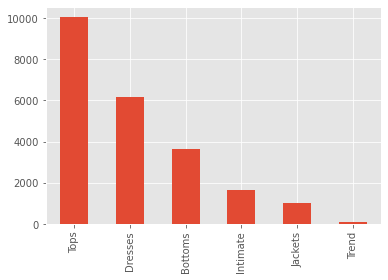

In [42]:
df['Department Name'].value_counts().plot.bar()

In [43]:
df['Department Name'].value_counts()

Tops        10048
Dresses      6146
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: Department Name, dtype: int64

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [47]:
# Handle any outliers in your dataframe 
# Chemises and casual bottoms are such a small sample. I'm removing them.
review_missing = df[df['Class Name']=='Casual bottoms'].index
df = df.drop(review_missing, axis=0)
review_missing = df[df['Class Name']=='Chemises'].index
df = df.drop(review_missing, axis=0)

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [49]:
# Look for any irrelevant data in the dataframe. How will you handle it?
# You could drop the missing columns that were added above.
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Title_ismissing',
       'Review Text_ismissing', 'Division Name_ismissing',
       'Department Name_ismissing', 'Class Name_ismissing', 'num_missing'],
      dtype='object')

In [54]:
df = df.drop(columns=['Unnamed: 0','Title_ismissing','Review Text_ismissing', 'Division Name_ismissing','Department Name_ismissing', 'Class Name_ismissing', 'num_missing'])

In [55]:
# Look for duplicates. How will you handle any duplicates?
# Dropped duplicates with matching Review Text, since those are more likely to be spam
df = df.drop_duplicates (subset=['Review Text'])

In [56]:
df.shape

(22633, 10)

In [17]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
# Depending on the analysis needs, all collumns seem potentially relevent. 
#If looking for straight statistical analysis, the review and title texts may be droppable.
# If doing sentiment analysis, age seems irrelevant.
# Recommended IND may not give much extra information. But maybe.
#Positive Feedback may be useful in picking reviews to look at directly, but since the feedback is on the comment, not the product, it could be dropped for other analysis.

## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [60]:
# Try to convert all the strings in a column to lower or upper case. 
df['Review Text'] = df['Review Text'].str.lower()

In [61]:
df['Review Text'] = df['Review Text'].str.strip()

In [63]:
df['Review Text'] = df['Review Text'].str.replace('\\.', '', regex=True)

In [65]:
df['Review Text'] = df['Review Text'].str.replace('\\,', '', regex=True)

In [67]:
df['Review Text'] = df['Review Text'].str.replace('\\-', '', regex=True)

In [69]:
df['Review Text'] = df['Review Text'].str.replace('\\!', '', regex=True)

In [70]:
df['Review Text']

0        absolutely wonderful  silky and sexy and comfo...
1        love this dress  it's sooo pretty  i happened ...
2        i had such high hopes for this dress and reall...
3        i love love love this jumpsuit it's fun flirty...
4        this shirt is very flattering to all due to th...
                               ...                        
23481    i was very happy to snag this dress at such a ...
23482    it reminds me of maternity clothes soft stretc...
23483    this fit well but the top was very see through...
23484    i bought this dress for a wedding i have this ...
23485    this dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22633, dtype: object

In [72]:
# Drop duplicates once formatting is stripped. Drops 1 duplicate.
df = df.drop_duplicates (subset=['Review Text'])

In [76]:
# Find edit distance to look for very similar reviews that may indicate spam.
from nltk.metrics import edit_distance

In [81]:
editdis = []
for x, itemx in enumerate(df['Review Text'][0:100]):
    for y, itemy in enumerate(df['Review Text'][0:100]):
        if x < y:
            distance = edit_distance(str(itemx),str(itemy))
            dictionary = {'x': x, 'y': y, 'distance':distance, 'text1':itemx, 'text2':itemy}
            editdis.append(dictionary)
distance_df = pd.DataFrame(editdis)
distance_df.head()

x  y  distance                                              text1  \
0  0  1       261  absolutely wonderful  silky and sexy and comfo...   
1  0  2       446  absolutely wonderful  silky and sexy and comfo...   
2  0  3        90  absolutely wonderful  silky and sexy and comfo...   
3  0  4       155  absolutely wonderful  silky and sexy and comfo...   
4  0  5       434  absolutely wonderful  silky and sexy and comfo...   

                                               text2  
0  love this dress  it's sooo pretty  i happened ...  
1  i had such high hopes for this dress and reall...  
2  i love love love this jumpsuit it's fun flirty...  
3  this shirt is very flattering to all due to th...  
4  i love tracy reese dresses but this one is not...

In [82]:
distance_df.sort_values('distance')

x   y  distance                                              text1  \
3833  52  64        34  love the color and style but material snags ea...   
4336  64  81        37  loved this top and was really happy to find it...   
10     0  11        39  absolutely wonderful  silky and sexy and comfo...   
63     0  64        40  absolutely wonderful  silky and sexy and comfo...   
1074  11  52        41  this dress is perfection so pretty and flattering   
...   ..  ..       ...                                                ...   
13     0  14       451  absolutely wonderful  silky and sexy and comfo...   
3843  52  74       452  love the color and style but material snags ea...   
1048  11  26       452  this dress is perfection so pretty and flattering   
2274  26  52       452  i have been waiting for this sweater coat to s...   
25     0  26       453  absolutely wonderful  silky and sexy and comfo...   

                                                  text2  
3833  loved this top and was really happy to find it...  
4336  loved this top great design comfortable and un...  
10    this dress is perfection so pretty and flattering  
63    loved this top and was really happy to find it...  
1074  love the color and style but material snags ea...  
...                                                 ...  
13    this is a nice choice for holiday gatherings i...  
3843  i passed up this dress so many times in the st...  
1048  i have been waiting for this sweater coat to s...  
2274  love the color and style but material snags ea...  
25    i have been waiting for this sweater coat to s...  

[4950 rows x 5 columns]

In [84]:
distance_df.to_csv('distance_df.csv')